In [1]:
import pandas as pd
import numpy as np
import datetime
import math

bike_df = pd.read_csv('desktop/citibike_data/JC-201901-citibike-tripdata.csv')

trip_year = []

trip_month = []

for n in range(len(bike_df)):
    trip_year.append(2019)
    trip_month.append(1)
    
bike_df['trip_year'] = trip_year
bike_df['trip_month'] = trip_month

bike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_year,trip_month
0,201,12:09:10 AM,12:12:31 AM,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019,1
1,505,12:18:00 AM,12:26:26 AM,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019,1
2,756,12:36:33 AM,12:49:10 AM,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019,1
3,1575,12:43:39 AM,12:09:54 AM,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019,1
4,1566,12:43:40 AM,12:09:46 AM,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019,1


In [2]:
bike_df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
trip_year                    int64
trip_month                   int64
dtype: object

In [3]:
#test csv formatted in excel, with the second option down in the custom datatype

bike_df[['starttime', 'stoptime']] = bike_df[['starttime', 'stoptime']].apply(pd.to_datetime)

bike_df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
trip_year                           int64
trip_month                          int64
dtype: object

In [4]:
bike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_year,trip_month
0,201,2021-04-18 00:09:10,2021-04-18 00:12:31,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019,1
1,505,2021-04-18 00:18:00,2021-04-18 00:26:26,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019,1
2,756,2021-04-18 00:36:33,2021-04-18 00:49:10,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019,1
3,1575,2021-04-18 00:43:39,2021-04-18 00:09:54,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019,1
4,1566,2021-04-18 00:43:40,2021-04-18 00:09:46,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019,1


In [5]:
#This function is designed to read in the .csvs for a date range. 
#the read in .csv files will be concatenated with bike_df
#the month and year columns will be added similar to above


def add_data(month_i, month_f, year, df):
    #add 1 for the range function since the second value is not included in range() method
    month_f = month_f + 1
     
    for i in range(month_i, month_f):
        
        #read in file and add to a df
        if i < 10:
            placehold_df = pd.read_csv(f'desktop/citibike_data/JC-{year}0{i}-citibike-tripdata.csv')
            print(f'desktop/citibike_data/JC-{year}0{i}-citibike-tripdata.csv added')
        else:
            placehold_df = pd.read_csv(f'desktop/citibike_data/JC-{year}{i}-citibike-tripdata.csv')
            print(f'desktop/citibike_data/JC-{year}{i}-citibike-tripdata.csv added')
            
        #make new lists for new columns
        year_c = []
        month_c = []
        
        #populate the list        
        for j in range(len(placehold_df)):
            year_c.append(year)
            month_c.append(i)
            
        #add the lists to placehold_df as columns
        placehold_df['trip_year'] = year_c
        placehold_df['trip_month'] = month_c
        
        #fix the starttime and stoptime columns
        placehold_df[['starttime', 'stoptime']] = placehold_df[['starttime', 'stoptime']].apply(pd.to_datetime)
        
        #concatinate placehold_df into df passed to function
        dfs = [df, placehold_df]
        df = pd.concat(dfs)
        print(len(df))
    
    #return updated df
    return df

#call function for the rest of 2019
bike_df = add_data(2, 12, 2019, bike_df)


#check result
print(len(bike_df))
bike_df.tail()

desktop/citibike_data/JC-201902-citibike-tripdata.csv added
38241
desktop/citibike_data/JC-201903-citibike-tripdata.csv added
61847
desktop/citibike_data/JC-201904-citibike-tripdata.csv added
94903
desktop/citibike_data/JC-201905-citibike-tripdata.csv added
131038
desktop/citibike_data/JC-201906-citibike-tripdata.csv added
170468
desktop/citibike_data/JC-201907-citibike-tripdata.csv added
214214
desktop/citibike_data/JC-201908-citibike-tripdata.csv added
262925
desktop/citibike_data/JC-201909-citibike-tripdata.csv added
312169
desktop/citibike_data/JC-201910-citibike-tripdata.csv added
354422
desktop/citibike_data/JC-201911-citibike-tripdata.csv added
385219
desktop/citibike_data/JC-201912-citibike-tripdata.csv added
404947
404947


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_year,trip_month
19723,283,2021-04-18 23:12:19,2021-04-18 23:17:02,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29245,Customer,1990,1,2019,12
19724,267,2021-04-18 23:19:04,2021-04-18 23:23:31,3186,Grove St PATH,40.719586,-74.043117,3205,JC Medical Center,40.716540,-74.049638,26153,Subscriber,1989,1,2019,12
19725,379,2021-04-18 23:19:07,2021-04-18 23:25:26,3209,Brunswick St,40.724176,-74.050656,3185,City Hall,40.717733,-74.043845,26276,Subscriber,1984,1,2019,12
19726,188,2021-04-18 23:24:00,2021-04-18 23:27:09,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,29461,Subscriber,1987,1,2019,12
19727,326,2021-04-18 23:45:21,2021-04-18 23:50:48,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29123,Subscriber,1988,1,2019,12


In [6]:
bike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_year,trip_month
0,201,2021-04-18 00:09:10,2021-04-18 00:12:31,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019,1
1,505,2021-04-18 00:18:00,2021-04-18 00:26:26,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019,1
2,756,2021-04-18 00:36:33,2021-04-18 00:49:10,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019,1
3,1575,2021-04-18 00:43:39,2021-04-18 00:09:54,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019,1
4,1566,2021-04-18 00:43:40,2021-04-18 00:09:46,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019,1


In [7]:
bike_df = add_data(1, 12, 2020, bike_df)

desktop/citibike_data/JC-202001-citibike-tripdata.csv added
430967
desktop/citibike_data/JC-202002-citibike-tripdata.csv added
453929
desktop/citibike_data/JC-202003-citibike-tripdata.csv added
471648
desktop/citibike_data/JC-202004-citibike-tripdata.csv added
480916
desktop/citibike_data/JC-202005-citibike-tripdata.csv added
505993
desktop/citibike_data/JC-202006-citibike-tripdata.csv added
542914
desktop/citibike_data/JC-202007-citibike-tripdata.csv added
581594
desktop/citibike_data/JC-202008-citibike-tripdata.csv added
624861
desktop/citibike_data/JC-202009-citibike-tripdata.csv added
678694
desktop/citibike_data/JC-202010-citibike-tripdata.csv added
708780
desktop/citibike_data/JC-202011-citibike-tripdata.csv added
730055
desktop/citibike_data/JC-202012-citibike-tripdata.csv added
741749


In [8]:
bike_df = add_data(1, 3, 2021, bike_df)

desktop/citibike_data/JC-202101-citibike-tripdata.csv added
753373
desktop/citibike_data/JC-202102-citibike-tripdata.csv added
758098
desktop/citibike_data/JC-202103-citibike-tripdata.csv added
774941


In [9]:
#create a combined column for month and year

month_ar = bike_df['trip_month'].to_numpy()

year_ar = bike_df['trip_year'].to_numpy()

mon_year = []

for m in range(len(month_ar)):
    mon_year.append(f'{year_ar[m]}_{month_ar[m]}')
    
bike_df['year_mon'] = mon_year

bike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_year,trip_month,year_mon
0,201,2021-04-18 00:09:10,2021-04-18 00:12:31,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019,1,2019_1
1,505,2021-04-18 00:18:00,2021-04-18 00:26:26,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019,1,2019_1
2,756,2021-04-18 00:36:33,2021-04-18 00:49:10,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019,1,2019_1
3,1575,2021-04-18 00:43:39,2021-04-18 00:09:54,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019,1,2019_1
4,1566,2021-04-18 00:43:40,2021-04-18 00:09:46,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019,1,2019_1


In [10]:

def length_check(df):
    print(f'There are {len(df)} lines in the dataframe')

length_check(bike_df)
bike_df.dtypes

There are 774941 lines in the dataframe


tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
trip_year                           int64
trip_month                          int64
year_mon                           object
dtype: object

In [11]:
#modify function for pre-2019 data
#this ended up being too much data


# def add_data_f2(month_i, month_f, year, df):
#     #add 1 for the range function since the second value is not included in range() method
#     month_f = month_f + 1
     
#     for i in range(month_i, month_f):
        
#         #read in file and add to a df
#         if i < 10:
#             placehold_df = pd.read_csv(f'desktop/citibike_data/{year}0{i}-citibike-tripdata.csv')
#             print(f'desktop/citibike_data/{year}0{i}-citibike-tripdata.csv added')
#         else:
#             placehold_df = pd.read_csv(f'desktop/citibike_data/{year}{i}-citibike-tripdata.csv')
#             print(f'desktop/citibike_data/{year}{i}-citibike-tripdata.csv added')
            
#         #make new lists for new columns
#         year_c = []
#         month_c = []
        
#         #populate the list        
#         for j in range(len(placehold_df)):
#             year_c.append(year)
#             month_c.append(i)
            
#         #add the lists to placehold_df as columns
#         placehold_df['trip_year'] = year_c
#         placehold_df['trip_month'] = month_c
        
#         #concatinate placehold_df into df passed to function
#         dfs = [df, placehold_df]
#         df = pd.concat(dfs)
#         print(len(df))
    
#     #return updated df
#     return df


# bike_df = add_data_f2(1, 12, 2018, bike_df)

In [12]:
#Write out combined dataset

#bike_df.to_csv('desktop/citibike_combined/citibike_combined_1.csv', index = False)

In [13]:
#filter out (dubious) age outliers 
bike_df = bike_df[bike_df['birth year'] > 1920]

length_check(bike_df)

There are 774723 lines in the dataframe


<AxesSubplot:>

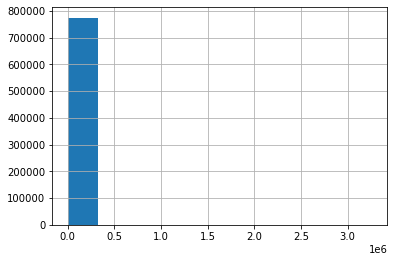

In [14]:
bike_df['tripduration'].hist()

In [15]:
bike_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,trip_year,trip_month
count,7.747230e+05,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000,774723.000000
mean,1.119586e+03,3298.718000,40.722493,-74.046556,3297.137839,40.722066,-74.045890,34309.077564,1981.102986,1.105922,2019.520399,6.673225
std,1.419099e+04,177.519212,0.007192,0.011376,185.206569,0.065814,0.119510,7503.764905,10.553776,0.590054,0.579027,3.120172
min,6.100000e+01,3183.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1930.000000,0.000000,2019.000000,1.000000
25%,2.610000e+02,3195.000000,40.717733,-74.050656,3193.000000,40.717733,-74.050444,29237.000000,1971.000000,1.000000,2019.000000,4.000000
50%,4.320000e+02,3209.000000,40.721525,-74.043845,3209.000000,40.721124,-74.043117,29606.000000,1984.000000,1.000000,2019.000000,7.000000
75%,8.710000e+02,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,42359.000000,1989.000000,1.000000,2020.000000,9.000000
max,3.261756e+06,3792.000000,40.748716,-74.032108,4071.000000,40.848282,0.000000,54358.000000,2004.000000,2.000000,2021.000000,12.000000


In [16]:
#write the file out

#bike_df.to_csv('desktop/citibike_combined/citibike_combined_1.csv', index = False)

In [17]:
#compute starting vs ending distances using the haversine formula
#https://www.movable-type.co.uk/scripts/latlong.html

def haversine(lat1, lat2, lon1, lon2):
    #earth radius in miles
    eRad = 3959
    
    #compute radian values and deltas
    lat1_rad = lat1*math.pi/180
    lat2_rad = lat2*math.pi/180
    d_lat = (lat2 - lat1)*math.pi/180
    d_lon = (lon2 - lon1)*math.pi/180
    
    #compute haversine a value
    hav_a = math.sin(d_lat/2)*math.sin(d_lat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(d_lon/2) * math.sin(d_lon/2)
    
    #compute haversine c value
    hav_c = 2*math.atan2( math.sqrt(hav_a), math.sqrt(1-hav_a) )
    
    #compute distance in miles
    distance = eRad*hav_c
    
    return distance

# test case Ann Arbor coordinates: 42.2808, 83.7430; Detroit coordinates: 42.3314, 83.0458. Distance is around 40 miles
    
print(f'Your calculated distance from Detroit to Ann Arbor is {haversine(42.3314, 42.3314, 83.7430, 83.0458)} miles')

Your calculated distance from Detroit to Ann Arbor is 35.61373346086836 miles


In [18]:
# use the haversine function to add a new column for distance travelled in a trip

#break out the relevant columns as numpy arrays
slat = bike_df['start station latitude'].to_numpy()
slon = bike_df['start station longitude'].to_numpy()
flat = bike_df['end station latitude'].to_numpy()
flon = bike_df['end station longitude'].to_numpy()

trip_distance = []

#using a loop here because the function didn't like it when I passed in arrays

for h in range(len(slat)):
    t_dist = haversine(slat[h], flat[h], slon[h], flon[h])
    trip_distance.append(t_dist)

bike_df['trip displacement'] = trip_distance

bike_df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_year,trip_month,year_mon,trip displacement
0,201,2021-04-18 00:09:10,2021-04-18 00:12:31,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,2019,1,2019_1,0.287594
1,505,2021-04-18 00:18:00,2021-04-18 00:26:26,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,2019,1,2019_1,0.566053
2,756,2021-04-18 00:36:33,2021-04-18 00:49:10,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,2019,1,2019_1,1.215180
3,1575,2021-04-18 00:43:39,2021-04-18 00:09:54,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,2019,1,2019_1,0.566053
4,1566,2021-04-18 00:43:40,2021-04-18 00:09:46,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,2019,1,2019_1,0.566053
5,737,2021-04-18 00:56:53,2021-04-18 00:09:11,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,-74.049638,29447,Subscriber,1993,1,2019,1,2019_1,0.847580
6,917,2021-04-18 00:03:45,2021-04-18 00:19:03,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,-74.066611,29299,Subscriber,1986,1,2019,1,2019_1,1.741180
7,3248,2021-04-18 00:12:03,2021-04-18 00:06:12,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,29495,Subscriber,1992,1,2019,1,2019_1,2.016566
8,3168,2021-04-18 00:13:12,2021-04-18 00:06:00,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,26312,Customer,1969,0,2019,1,2019_1,2.016566
9,353,2021-04-18 00:07:45,2021-04-18 00:13:38,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,26212,Subscriber,1994,1,2019,1,2019_1,0.758619


In [19]:
bike_df['trip displacement'].describe()

count    774723.000000
mean          0.634384
std           8.668912
min           0.000000
25%           0.345990
50%           0.549815
75%           0.848456
max        5389.530907
Name: trip displacement, dtype: float64

In [21]:
#large distance value is due to zeros in lat and lon colums. Filtering that out

bike_df = bike_df[bike_df['trip displacement'] < 100]

length_check(bike_df)

bike_df['trip displacement'].describe()

There are 774721 lines in the dataframe


count    774721.000000
mean          0.620475
std           0.452345
min           0.000000
25%           0.345990
50%           0.549815
75%           0.848456
max          10.676428
Name: trip displacement, dtype: float64

In [22]:
#write the data out again

bike_df.to_csv('desktop/citibike_combined/citibike_combined_1.csv', index = False)